In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

ca_housing_path = "Resources/CA_Housing_Data.csv"

ca_housing_data = pd.read_csv(ca_housing_path)

ca_housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [2]:
Near_Bay_Pop = ca_housing_data.loc[ca_housing_data["ocean_proximity"] == "NEAR BAY", "population"].mean()
Inland_Pop = ca_housing_data.loc[ca_housing_data["ocean_proximity"] == "INLAND", "population"].mean()
Under_Hour_Pop = ca_housing_data.loc[ca_housing_data["ocean_proximity"] == "<1H OCEAN", "population"].mean()
Near_Ocean_Pop = ca_housing_data.loc[ca_housing_data["ocean_proximity"] == "NEAR OCEAN", "population"].mean()
Island_pop = ca_housing_data.loc[ca_housing_data["ocean_proximity"] == "ISLAND", "population"].mean()

print(Near_Ocean_Pop)
print(Near_Bay_Pop)
print(Inland_Pop)
print(Under_Hour_Pop)
print(Island_pop)

1354.0086531226486
1230.3174672489083
1391.0462524805373
1520.2904991243433
668.0


In [19]:
# Put proximities into a list for for loop (and later for plot labels)
Ocean_Proximity = ["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]
Ocean_Proximity

# Create empty list to fill with population data (for plotting)
population_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for proximity in Ocean_Proximity:

     # Locate the rows which contain the population data for each category of ocean proximity
    Population = ca_housing_data.loc[ca_housing_data["ocean_proximity"] == proximity, "population"]
    
    quartiles = Population.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset
    population_data.append(Population)

    # Determine outliers using upper and lower bounds
    
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)

    outliers_population = Population[(Population < lower_bound) | (Population > upper_bound)]

    print(f"{proximity}'s potential outliers: {outliers_population.tolist()}")

ISLAND's potential outliers: []
NEAR OCEAN's potential outliers: [3546, 2907, 2931, 3030, 2994, 2951, 3010, 3625, 3916, 3002, 3543, 3744, 2924, 3018, 3580, 3940, 4812, 3184, 3068, 3087, 3891, 3333, 4168, 4649, 4713, 4474, 6897, 3392, 3176, 9873, 12873, 4054, 5175, 3108, 3083, 3438, 3033, 3555, 3868, 3280, 3727, 7302, 2945, 3031, 3093, 6303, 7604, 7301, 3784, 2961, 3009, 3102, 3122, 3185, 3174, 5176, 3148, 3284, 3293, 4451, 4797, 3662, 3675, 3127, 3261, 3222, 3123, 3795, 5094, 3002, 3073, 4771, 4495, 7985, 3159, 3269, 3280, 3020, 3898, 5613, 4194, 4496, 4773, 5495, 2904, 4163, 4729, 3015, 6666, 8738, 4127, 2983, 3760, 10877, 3335, 3097, 3574, 6532, 4375, 2923, 3477, 3320, 3752, 3226, 3861, 3288, 2941, 4101, 3444, 5130, 5023, 4674, 6160, 3783, 3004, 4790, 3169, 6266, 3107, 4124, 3571, 3057, 3081, 3502, 5467, 12427, 5723, 7174, 4731, 3416, 3018, 2954, 3982, 3012, 4647, 7132, 3504, 3171, 3327, 6370, 4818, 3295, 3490, 2986, 3310, 5534, 4066, 3129, 6242, 6437, 5558, 2965, 3700, 6187]
NEAR BA

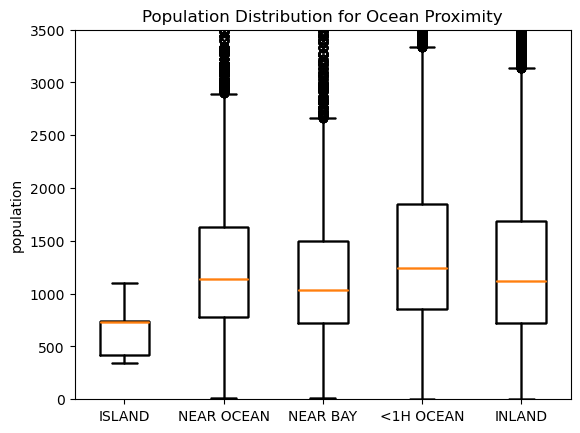

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_ylabel('population')

for proximity in Ocean_Proximity:
    ax1.boxplot(population_data)

ax1.set_xticks([1, 2, 3, 4, 5])
ax1.set_xticklabels(Ocean_Proximity)
plt.ylim(0, 3500)
plt.title('Population Distribution for Ocean Proximity')
plt.show()